In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression

In [80]:
datos = pd.read_csv('D:/3.-InteligenciaClase/Dataset/eventos.csv',delimiter=',')
datos.head()

,Edad,Experiencia,Calificacion,Pais,Asistir
0,36,10,6,Ecuador,Si
1,27,8,7,Colombia,No
2,45,1,8,Argentina,Si
3,18,2,5,Argentina,Si
4,31,4,8,Mexico,Si


In [81]:
datos.Pais.value_counts()

Pais
Ecuador      5
Colombia     4
Argentina    3
Mexico       3
Name: count, dtype: int64

In [82]:
print(datos.info())
d = {'Ecuador':0,'Colombia':1,'Argentina':2,'Mexico':3}
a = {'Si':1,'No':0}
datos['Pais'] = datos['Pais'].map(d)
datos['Asistir'] = datos['Asistir'].map(a);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Edad          15 non-null     int64 
 1   Experiencia   15 non-null     int64 
 2   Calificacion  15 non-null     int64 
 3   Pais          15 non-null     object
 4   Asistir       15 non-null     object
dtypes: int64(3), object(2)
memory usage: 732.0+ bytes
None


## Debo justificar el proque escogi esas variables para el estudio de prediccion. 

In [83]:
X = datos.drop('Asistir',axis=1)
y = datos['Asistir']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
## Utilizando la Entropia 
classiEntro = tree.DecisionTreeClassifier(criterion='entropy')

In [86]:
classiEntro.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
classiEntro.score(X_test,y_test)

0.3333333333333333

In [88]:
conf_matr_entro = confusion_matrix(y_test,classiEntro.predict(X_test))
conf_matr_entro

array([[1, 2],
       [0, 0]], dtype=int64)

In [89]:
## Utilizando el parametro de impureza con Gini
classiGini = tree.DecisionTreeClassifier(criterion='gini')
classiGini.fit(X_train, y_train)
classiGini.score(X_test,y_test)
conf_matr_gini = confusion_matrix(y_test,classiGini.predict(X_test))
conf_matr_gini

array([[1, 2],
       [0, 0]], dtype=int64)

<Axes: >

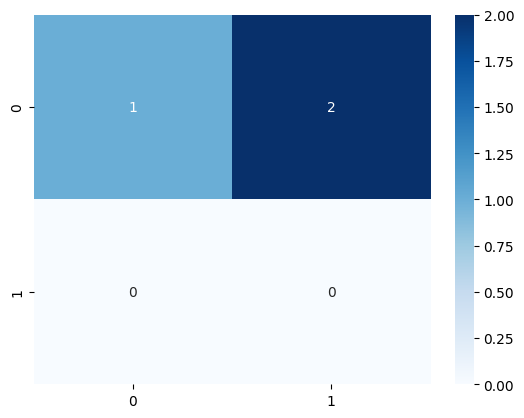

In [94]:
sns.heatmap(conf_matr_gini, annot=True, fmt='d', cmap='Blues')

In [95]:
## sns.heatmap(datos.corr(), annot=True,fmt='2g', linewidths=1.5, cmap='tab20c');

In [96]:
#TP_rate = TP / (TP + FN)
#FP_rate = FP / (FP + TN)
#Precision = TP / (TP + FP)
#Recall = TP / (TP + FN)
#F_measure = 2 * (Precision * Recall) / (Precision + Recall)
#MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

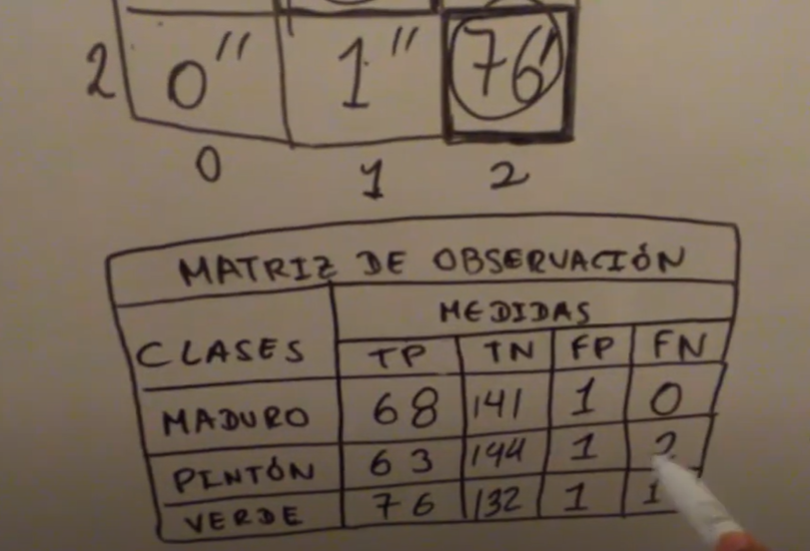

In [97]:
## sns.violinplot(x="matricula", y="notas_matematicas", data=data)

In [ ]:
# b. Usar Sklearn LinearRegression
# Separar la variable independiente (X) de la variable dependiente (y)
X_reg = data["matricula"].values.reshape(-1, 1)
y_reg = data["notas_matematicas"].values

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train_reg, y_train_reg)

# c. Usar librería OLS
# Agregar una constante al conjunto de características para usar en statsmodels
X_train_reg_sm = sm.add_constant(X_train_reg)

# Inicializar y ajustar el modelo de regresión lineal usando OLS
regression_model_ols = sm.OLS(y_train_reg, X_train_reg_sm).fit()

# d. Graficar la Recta de Regresión y los Residuos
# Para el modelo de Sklearn LinearRegression
plt.scatter(X_train_reg, y_train_reg, color='blue')
plt.plot(X_train_reg, regression_model_sklearn.predict(X_train_reg), color='red')
plt.title("Regresión Lineal - Sklearn")
plt.xlabel("Matrícula")
plt.ylabel("Notas de Matemáticas")
plt.show()

# Para el modelo de OLS
plt.scatter(X_train_reg, y_train_reg, color='blue')
plt.plot(X_train_reg, regression_model_ols.predict(X_train_reg_sm), color='red')
plt.title("Regresión Lineal - OLS")
plt.xlabel("Matrícula")
plt.ylabel("Notas de Matemáticas")
plt.show()

# Visualizar los residuos del modelo de OLS
plt.scatter(X_train_reg, regression_model_ols.resid, color='green')
plt.title("Residuos de la Regresión Lineal - OLS")
plt.xlabel("Matrícula")
plt.ylabel("Residuos")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# e. Comparar resultados
# Podemos comparar los coeficientes de determinación (R^2) de ambos modelos
print